In [2]:
from google.colab import files
uploaded = files.upload()


Saving True.csv to True.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [9]:
# Read phishing emails (Fake)
df_phishing = pd.read_csv("Fake.csv")
df_phishing['label'] = 'phishing'

# Read legit emails (True)
df_legit = pd.read_csv("True.csv")
df_legit['label'] = 'legit'


In [6]:
!pip install nltk
!pip install wordcloud

# 📌 STEP 2: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# Combine both datasets
df = pd.concat([df_phishing, df_legit], ignore_index=True)

# Shuffle the combined dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display basic info
print(df['label'].value_counts())
df.head()


label
phishing    23481
legit       21417
Name: count, dtype: int64


title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date     label  
0    February 13, 2017  phishing  
1       April 5, 2017      legit  
2  September 27, 2017      legit  
3         May 22, 2017  phishing  
4       June 24, 2016      legit

In [12]:
df.columns



Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply to text column
df['clean_text'] = df['text'].apply(clean_text)

# Preview
df[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   

                                          clean_text  
0  21st century wire says ben stein reputable pro...  
1  washington reuters u president donald trump re...  
2  reuters puerto rico governor ricardo rossello ...  
3  monday donald trump embarrassed country accide...  
4  glasgow scotland reuters u presidential candid...

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_text'].value_counts()
    for x_label, grp in _df_2.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('clean_text')

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text']).toarray()

# Encode labels
y = df['label'].map({'phishing': 1, 'legit': 0})  # or {'FAKE': 1, 'REAL': 0} if those are labels


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


✅ Accuracy: 0.9271714922048998

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4270
           1       0.93      0.93      0.93      4710

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



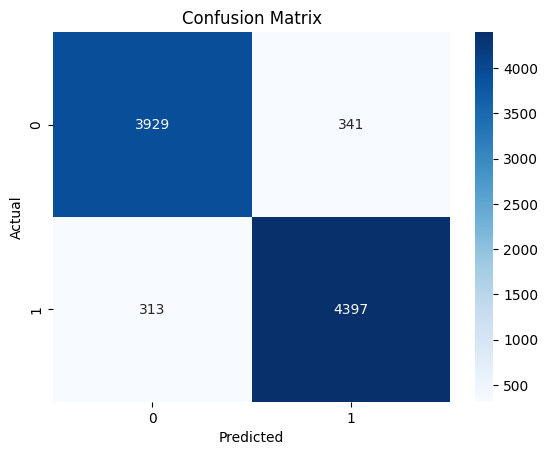

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/tmp/ipython-input-18-1244545324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


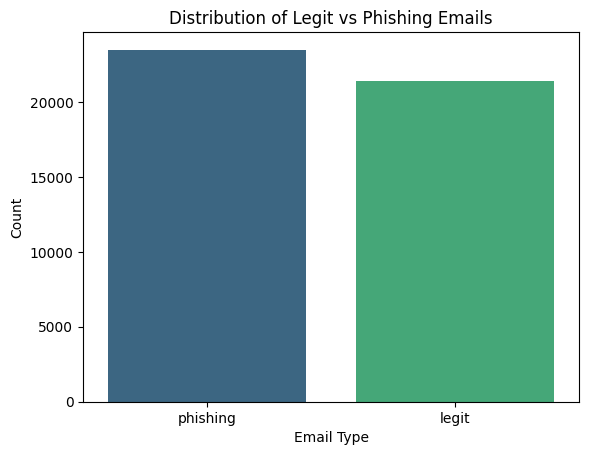

label
phishing    23481
legit       21417
Name: count, dtype: int64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each label
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Legit vs Phishing Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

# Optional: Print exact counts
print(df['label'].value_counts())
